In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
"""
Simulate error in measurement for different contact resistances and soil potentials, assuming an Voltmeter impedence of 50Mohms.
"""

'\nSimulate error in measurement for different contact resistances and soil potentials, assuming an Voltmeter impedence of 50Mohms.\n'

[[5.40529676e-08 1.16014923e-08 6.49763126e-09 ... 3.11325505e-10
  3.04851612e-10 2.98640499e-10]
 [5.08713884e-06 3.25746684e-06 2.39568128e-06 ... 1.85001493e-07
  1.81270502e-07 1.77686457e-07]
 [5.50530897e-06 4.22111071e-06 3.42260553e-06 ... 3.58597904e-07
  3.51577626e-07 3.44825876e-07]
 ...
 [5.96841192e-06 5.88506714e-06 5.80400514e-06 ... 3.57800651e-06
  3.54765880e-06 3.51781684e-06]
 [5.96870301e-06 5.88704820e-06 5.80758478e-06 ... 3.60795892e-06
  3.57773518e-06 3.54800890e-06]
 [5.96897482e-06 5.88894244e-06 5.81101544e-06 ... 3.63716107e-06
  3.60706439e-06 3.57745701e-06]]


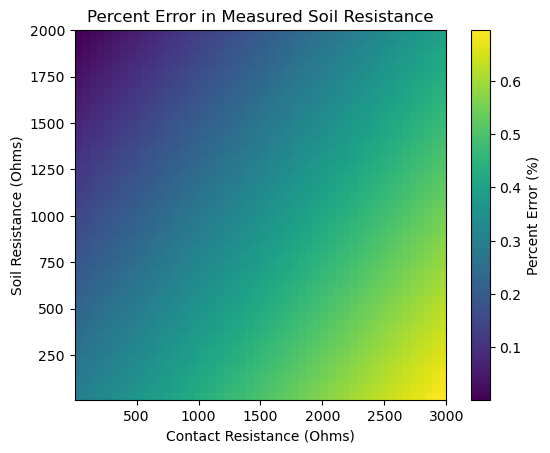

In [12]:
rc = np.linspace(10, 2000) # range of contact resistances
x = np.linspace(0.1, 3000) # range of soil resistances

Rcs, Xs = np.meshgrid(rc, x)

E = 12

Rvolt = 1e6
Rs1 = Xs/2
Rs2 = Xs/2
Rsh = 2

parres = 1/((1/Xs) + 1/(2*Rcs + Rvolt))
Iinj = E/(Rsh + 2*Rcs + Rs1 + Rs2 + parres)
i1 = Iinj*Xs/(2*Rcs + Rvolt +Xs)
Ix = Iinj - i1

xmeas = (Ix*Xs - 2*i1*Rcs)/(Ix + i1)

plt.imshow(100*np.abs((xmeas - Xs)/Xs), extent=[min(x),max(x),min(rc),max(rc)], aspect=max(x)/max(rc))


# plt.imshow(parres)
plt.colorbar(label="Percent Error (%)")

plt.title("Percent Error in Measured Soil Resistance")
plt.xlabel("Contact Resistance (Ohms)")
plt.ylabel("Soil Resistance (Ohms)")

print(i1)